In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15

In [2]:
interpreter = tf.lite.Interpreter(model_path="./ssd_mobilenet_v1_1_default_1.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [3]:
input_details

[{'name': 'normalized_input_image_tensor',
  'index': 175,
  'shape': array([  1, 300, 300,   3]),
  'shape_signature': array([  1, 300, 300,   3]),
  'dtype': numpy.uint8,
  'quantization': (0.0078125, 128),
  'quantization_parameters': {'scales': array([0.0078125], dtype=float32),
   'zero_points': array([128]),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [4]:
output_details

[{'name': 'TFLite_Detection_PostProcess',
  'index': 167,
  'shape': array([ 1, 10,  4]),
  'shape_signature': array([ 1, 10,  4]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'TFLite_Detection_PostProcess:1',
  'index': 168,
  'shape': array([ 1, 10]),
  'shape_signature': array([ 1, 10]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'TFLite_Detection_PostProcess:2',
  'index': 169,
  'shape': array([ 1, 10]),
  'shape_signature': array([ 1, 10]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quanti

In [12]:
def check_pos(pos):
    dim = [1280, 720]
    for i in range(2):
        if pos[i] <= 150:
            pos[i] = 151
        elif dim[i]-pos[i] <= 150:
            pos[i] = dim[i]-151
    return pos
    
def detect(img_rgb, pos, interpreter):
    pos = check_pos(pos)
    img_rgb = img_rgb[int(pos[1]-150):int(pos[1]+150),int(pos[0]-150):int(pos[0]+150),:]
    #img_new = cv2.resize(img_rgb, (300,300), cv2.INTER_AREA)
    img_rgb = img_rgb.reshape([1,300,300,3])
    interpreter.set_tensor(input_details[0]['index'], img_rgb)
    interpreter.invoke()
    de_boxes = interpreter.get_tensor(output_details[0]['index'])[0]
    det_classes = interpreter.get_tensor(output_details[1]['index'])[0]
    det_scores = interpreter.get_tensor(output_details[2]['index'])[0]
    num_det = interpreter.get_tensor(output_details[3]['index'])[0]
    detections = []
    #for i in range(10):
    i = 0
    classId = int(det_classes[i])
    score = float(det_scores[i])
    bbox = [float(v) for v in de_boxes[i]]
    if classId == 8 and score >= .4:
        x = bbox[1] * 300 + pos[0]
        y = bbox[0] * 300 + pos[1]
        right = bbox[3] * 300 + pos[0]
        bottom = bbox[2] * 300 + pos[1]
        detections.append((x,y,right,bottom))
    return detections

In [13]:
import time
import os

pos = [853,450]
path = "D:\\Documents\\GitHub\\crowsnest\\test_frames\\6.mp4"
detections = []
for img in os.listdir(path):
    start = time.time()
    img = cv2.imread(os.path.join(path, img))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    detections.append(detect(img_rgb, pos, interpreter))
    end = time.time()
    print(end - start)

0.31615233421325684
0.31398868560791016
0.31648778915405273
0.32170987129211426
0.3189976215362549
0.3210115432739258
0.31800007820129395
0.31800007820129395
0.31798839569091797
0.32129812240600586
0.3189966678619385
0.31800079345703125
0.31853461265563965
0.3184831142425537
0.32196903228759766
0.3209996223449707
0.3190114498138428
0.3208174705505371
0.31800031661987305
0.31800150871276855
0.3180112838745117
0.32167744636535645
0.3179290294647217
0.31800007820129395
0.3180105686187744
0.31900668144226074
0.31800007820129395
0.3210303783416748
0.3189997673034668
0.31800007820129395
0.31800007820129395
0.3210000991821289
0.32703614234924316
0.32344937324523926
0.3200111389160156
0.321000337600708
0.31999969482421875
0.31999993324279785
0.32000017166137695
0.32000041007995605
0.3210783004760742
0.3190009593963623
0.3209989070892334
0.32392454147338867
0.32328176498413086
0.3210110664367676
0.3262171745300293
0.3230011463165283
0.3232765197753906
0.3200194835662842
0.32003307342529297
0.32

0.34114503860473633
0.3240208625793457
0.32201433181762695
0.31999754905700684
0.3214457035064697
0.32360291481018066
0.32036590576171875
0.31931304931640625
0.3209867477416992
0.32201218605041504
0.32200026512145996
0.32271242141723633
0.325991153717041
0.32224369049072266
0.3229999542236328
0.3229999542236328
0.3211197853088379
0.32102060317993164
0.32103538513183594
0.31998562812805176
0.31999993324279785
0.3200216293334961
0.31902265548706055
0.3200047016143799
0.3180201053619385
0.3200201988220215
0.31999993324279785
0.32000017166137695
0.3199925422668457
0.3200721740722656
0.3189995288848877
0.32099342346191406
0.32172536849975586
0.3230102062225342
0.32000041007995605
0.3222310543060303
0.3200204372406006
0.32001399993896484
0.319533109664917
0.31902098655700684
0.31999969482421875
0.3210005760192871
0.32006096839904785
0.32204151153564453
0.3200511932373047
0.32387399673461914
0.3235194683074951
0.329664945602417
0.32700061798095703
0.322002649307251
0.3212144374847412
0.322196

In [18]:
detections

[[(1034.7497909069061,
   581.0391694307327,
   1072.144183397293,
   595.7560032606125)],
 [(1048.8439767360687,
   580.6803524494171,
   1075.2554385662079,
   594.2789196968079)],
 [(1049.1071014404297,
   579.5450180768967,
   1080.0410537719727,
   594.4963127374649)],
 [(1051.310500383377,
   581.0310155153275,
   1084.2632977962494,
   594.8462158441544)],
 [(1061.8629007339478,
   578.8459539413452,
   1091.834297657013,
   594.2774176597595)],
 [(1060.9032957553864,
   578.1727641820908,
   1096.0067241191864,
   595.4095870256424)],
 [(1062.970635175705, 579.7193259000778, 1100.365027666092, 596.157905459404)],
 [(1064.9676291942596,
   579.6187251806259,
   1102.9577581882477,
   595.7995265722275)],
 [(1077.5797336101532,
   580.2034646272659,
   1107.5511305332184,
   593.3788865804672)],
 [(1077.6954441070557,
   581.2459588050842,
   1110.648241519928,
   594.6312725543976)],
 [(1084.9288611412048,
   581.9469273090363,
   1113.5122685432434,
   593.9303040504456)],
 [(1

In [38]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [19]:
def bbox_2_gps(x, height, width):
    factor = 1.2e-5
    FOV = 1.2007999999999779
    RHS_Ang = -0.373448408973746
    x_cent = x + width//2
    lon = factor/(height/720)*np.cos((1-x_cent/1280)*FOV+RHS_Ang)
    lat = factor/(height/720)*np.sin((1-x_cent/1280)*FOV+RHS_Ang)
    return lon, lat

In [33]:
gps = []
for detection in detections:
    if len(detection) >= 1:
        x, y, right, bottom = detection[0]
        width = right-x
        height = bottom-y
        gps.append(bbox_2_gps(x, height, width))
gps = np.array(gps)

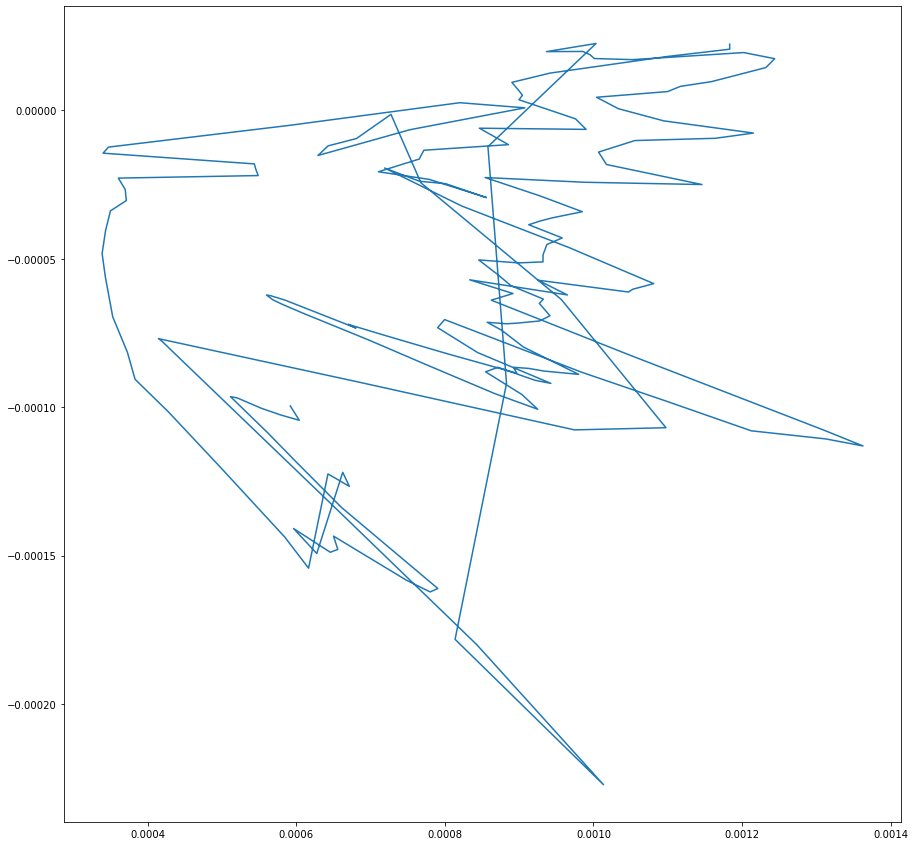

In [39]:
plt.plot(moving_average(gps[:,0]),moving_average(gps[:,1]))

In [73]:
from decord import VideoReader
from decord import cpu, gpu
import os
#https://medium.com/@haydenfaulkner/extracting-frames-fast-from-a-video-using-opencv-and-python-73b9b7dc9661


def extract_frames(video_path, initial_pos, overwrite=False, start=-1, end=-1, every=1):
    """
    Extract frames from a video using decord's VideoReader
    :param video_path: path of the video
    :param frames_dir: the directory to save the frames
    :param overwrite: to overwrite frames that already exist?
    :param start: start frame
    :param end: end frame
    :param every: frame spacing
    :return: count of images saved
    """

    video_path = os.path.normpath(video_path)  # make the paths OS (Windows) compatible

    video_dir, video_filename = os.path.split(video_path)  # get the video path and filename from the path

    assert os.path.exists(video_path)  # assert the video file exists

    # load the VideoReader
    vr = VideoReader(video_path, ctx=cpu(0))  # can set to cpu or gpu .. ctx=gpu(0)
                     
    if start < 0:  # if start isn't specified lets assume 0
        start = 0
    if end < 0:  # if end isn't specified assume the end of the video
        end = len(vr)

    frames_list = list(range(start, end, every))
    saved_count = 0
    
#     if every > 25 and len(frames_list) < 1000:  # this is faster for every > 25 frames and can fit in memory
#         frames = vr.get_batch(frames_list).asnumpy()
#             for frame in frames:
#                 detections = detect(frame)

# #         for index, frame in zip(frames_list, frames):  # lets loop through the frames until the end
# #             save_path = os.path.join(frames_dir, video_filename, "{:010d}.jpg".format(index))  # create the save path
# #             if not os.path.exists(save_path) or overwrite:  # if it doesn't exist or we want to overwrite anyways
# #                 cv2.imwrite(save_path, cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))  # save the extracted image
# #                 saved_count += 1  # increment our counter by one

    #else:  # this is faster for every <25 and consumes small memory
    detections = []
    pos = list(initial_pos)
    for index in range(start, end):  # lets loop through the frames until the end
        frame = vr[index]  # read an image from the capture
        detection = detect(frame, pos)
        detections.append(detection)
        x, y, right, bottom = detection[0]
        pos = [x + (right-x)//2, y + (bottom-y)//2]
            
#             if index % every == 0:  # if this is a frame we want to write out based on the 'every' argument
#                 save_path = os.path.join(frames_dir, video_filename, "{:010d}.jpg".format(index))  # create the save path
#                 if not os.path.exists(save_path) or overwrite:  # if it doesn't exist or we want to overwrite anyways
#                     cv2.imwrite(save_path, cv2.cvtColor(frame.asnumpy(), cv2.COLOR_RGB2BGR))  # save the extracted image
#                     saved_count += 1  # increment our counter by one
    return detections  # and return the count of the images we saved


def video_to_frames(video_path, initial_pos, overwrite=False, every=1):
    """
    Extracts the frames from a video
    :param video_path: path to the video
    :param frames_dir: directory to save the frames
    :param overwrite: overwrite frames if they exist?
    :param every: extract every this many frames
    :return: path to the directory where the frames were saved, or None if fails
    """

    video_path = os.path.normpath(video_path)  # make the paths OS (Windows) compatible

    video_dir, video_filename = os.path.split(video_path)  # get the video path and filename from the path
    
    print("Extracting frames from {}".format(video_filename))
    
    detections = extract_frames(video_path, initial_pos, every=every)  # let's now extract the frames

    return detections #os.path.join(frames_dir, video_filename)  # when done return the directory containing the frames


# if __name__ == '__main__':
#     # test it
#     video_to_frames(video_path='D:\\Documents\\GitHub\\crowsnest\\video_data\\6.mp4', frames_dir='test_frames', overwrite=False, every=5)

In [74]:
detections = video_to_frames(video_path='D:\\Documents\\GitHub\\crowsnest\\video_data\\6.mp4', initial_pos=(853,450), overwrite=False, every=1)

Extracting frames from 6.mp4


KeyboardInterrupt: 

In [60]:
detections.asnumpy()

array([[[108, 113, 137],
        [108, 113, 137],
        [108, 113, 137],
        ...,
        [140, 139, 156],
        [140, 139, 156],
        [140, 139, 156]],

       [[108, 113, 137],
        [108, 113, 137],
        [108, 113, 137],
        ...,
        [140, 139, 156],
        [140, 139, 156],
        [140, 139, 156]],

       [[108, 113, 137],
        [108, 113, 137],
        [108, 113, 137],
        ...,
        [140, 139, 156],
        [140, 139, 156],
        [140, 139, 156]],

       ...,

       [[ 74,  84,  81],
        [ 73,  83,  80],
        [ 72,  82,  79],
        ...,
        [ 50,  55,  51],
        [ 49,  54,  50],
        [ 49,  54,  50]],

       [[ 68,  78,  75],
        [ 69,  79,  76],
        [ 71,  81,  78],
        ...,
        [ 56,  61,  57],
        [ 57,  62,  58],
        [ 58,  63,  59]],

       [[ 62,  72,  69],
        [ 62,  72,  69],
        [ 64,  74,  71],
        ...,
        [ 69,  74,  70],
        [ 71,  76,  72],
        [ 74,  79,  75]]

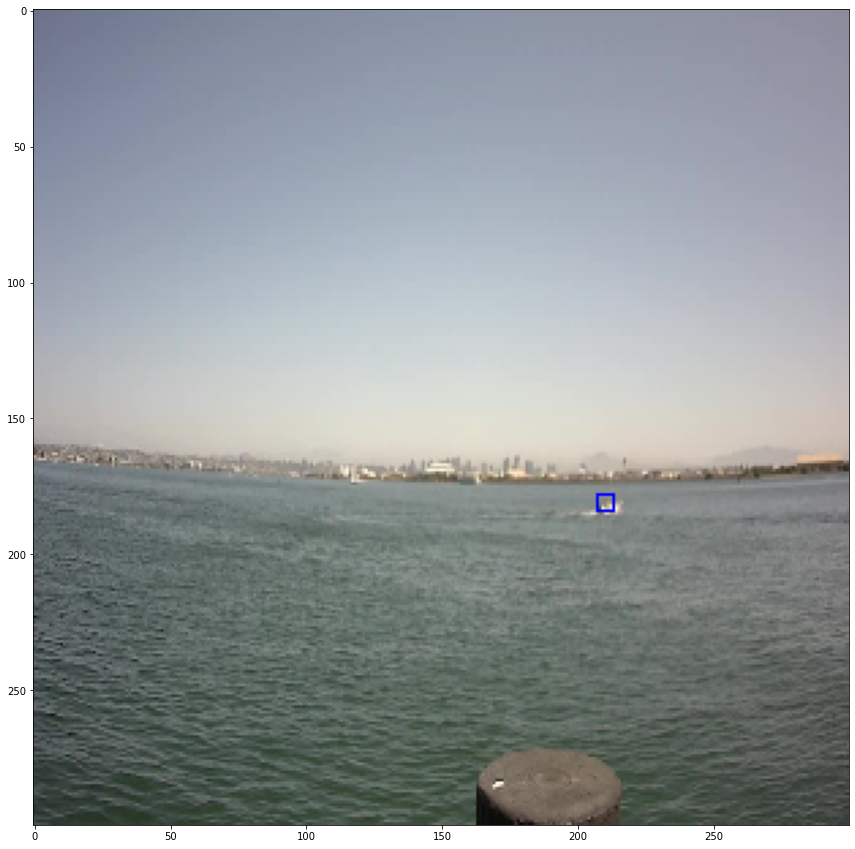

In [19]:
num = 1316
img = cv2.imread(f'D:\\Documents\\GitHub\\crowsnest\\video_data\\6_Moment.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img_rgb = img_rgb[100:,130:511]

img_new = cv2.resize(img_rgb, (300,300), cv2.INTER_AREA)
img_rgb = img_new.reshape([1,300,300,3])
interpreter.set_tensor(input_details[0]['index'], img_rgb)
interpreter.invoke()
de_boxes = interpreter.get_tensor(output_details[0]['index'])[0]
det_classes = interpreter.get_tensor(output_details[1]['index'])[0]
det_scores = interpreter.get_tensor(output_details[2]['index'])[0]
num_det = interpreter.get_tensor(output_details[3]['index'])[0]
font = cv2.FONT_HERSHEY_SIMPLEX
total = 300*300
obscured = 0
for i in range(10):
    classId = int(det_classes[i])
    score = float(det_scores[i])
    bbox = [float(v) for v in de_boxes[i]]
    if classId == 8 and score >= .4:
        x = bbox[1] * 300
        y = bbox[0] * 300
        right = bbox[3] * 300
        bottom = bbox[2] * 300
        obscured += (right-x)*(bottom-y)
        img_new = cv2.rectangle(img_new,
                      (int(x), int(y)),
                      (int(right), int(bottom)),
                      (0, 0, 255),
                      thickness=1)

        img_new = cv2.putText(img_new,f'{classId}',(int(x),int(y+8)), font, 0, (200,0,0), 1, cv2.LINE_AA)
        #print('SCORE:',score, ', Class:','person', ', BBox:',int(x),int(y),int(right),int(bottom))
# metric = obscured/total
# print(metric)
# if metric >= .005 and metric < .06:
#     print("Pedestrians in Vicinity, Reduce Max Speed")
# if metric >= .06 and metric < .15:
#     print("Nearing Pedestrians")
# if metric >= .15 and metric < .3:
#     print("Very Close to Pedestrians")
# if metric >= .3:
#     print("Path Partially of Completely Obstructed by Pedestrians")
plt.imshow(img_new)

In [ ]:
import cv2  # still used to save images out
import os
import numpy as np
from decord import VideoReader
from decord import cpu, gpu


def extract_frames(video_path, frames_dir, overwrite=False, start=-1, end=-1, every=1):
    """
    Extract frames from a video using decord's VideoReader
    :param video_path: path of the video
    :param frames_dir: the directory to save the frames
    :param overwrite: to overwrite frames that already exist?
    :param start: start frame
    :param end: end frame
    :param every: frame spacing
    :return: count of images saved
    """

    video_path = os.path.normpath(video_path)  # make the paths OS (Windows) compatible
    frames_dir = os.path.normpath(frames_dir)  # make the paths OS (Windows) compatible

    video_dir, video_filename = os.path.split(video_path)  # get the video path and filename from the path

    assert os.path.exists(video_path)  # assert the video file exists

    # load the VideoReader
    vr = VideoReader(video_path, ctx=cpu(0))  # can set to cpu or gpu .. ctx=gpu(0)
                     
    if start < 0:  # if start isn't specified lets assume 0
        start = 0
    if end < 0:  # if end isn't specified assume the end of the video
        end = len(vr)

    frames_list = list(range(start, end, every))
    saved_count = 0

    if every > 25 and len(frames_list) < 1000:  # this is faster for every > 25 frames and can fit in memory
        frames = vr.get_batch(frames_list).asnumpy()

        for index, frame in zip(frames_list, frames):  # lets loop through the frames until the end
            save_path = os.path.join(frames_dir, video_filename, "{:010d}.jpg".format(index))  # create the save path
            if not os.path.exists(save_path) or overwrite:  # if it doesn't exist or we want to overwrite anyways
                cv2.imwrite(save_path, cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))  # save the extracted image
                saved_count += 1  # increment our counter by one

    else:  # this is faster for every <25 and consumes small memory
        for index in range(start, end):  # lets loop through the frames until the end
            frame = vr[index]  # read an image from the capture
            
            if index % every == 0:  # if this is a frame we want to write out based on the 'every' argument
                save_path = os.path.join(frames_dir, video_filename, "{:010d}.jpg".format(index))  # create the save path
                if not os.path.exists(save_path) or overwrite:  # if it doesn't exist or we want to overwrite anyways
                    cv2.imwrite(save_path, cv2.cvtColor(frame.asnumpy(), cv2.COLOR_RGB2BGR))  # save the extracted image
                    saved_count += 1  # increment our counter by one

    return saved_count  # and return the count of the images we saved


def video_to_frames(video_path, frames_dir, overwrite=False, every=1):
    """
    Extracts the frames from a video
    :param video_path: path to the video
    :param frames_dir: directory to save the frames
    :param overwrite: overwrite frames if they exist?
    :param every: extract every this many frames
    :return: path to the directory where the frames were saved, or None if fails
    """

    video_path = os.path.normpath(video_path)  # make the paths OS (Windows) compatible
    frames_dir = os.path.normpath(frames_dir)  # make the paths OS (Windows) compatible

    video_dir, video_filename = os.path.split(video_path)  # get the video path and filename from the path

    # make directory to save frames, its a sub dir in the frames_dir with the video name
    os.makedirs(os.path.join(frames_dir, video_filename), exist_ok=True)
    
    print("Extracting frames from {}".format(video_filename))
    
    extract_frames(video_path, frames_dir, every=every)  # let's now extract the frames

    return os.path.join(frames_dir, video_filename)  # when done return the directory containing the frames


if __name__ == '__main__':
    # test it
    video_to_frames(video_path='test.mp4', frames_dir='test_frames', overwrite=False, every=5)